In [2]:
import multinet_lib

import pathlib
import pandas as pd
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import henhoe2vec as hh2v
import ast
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

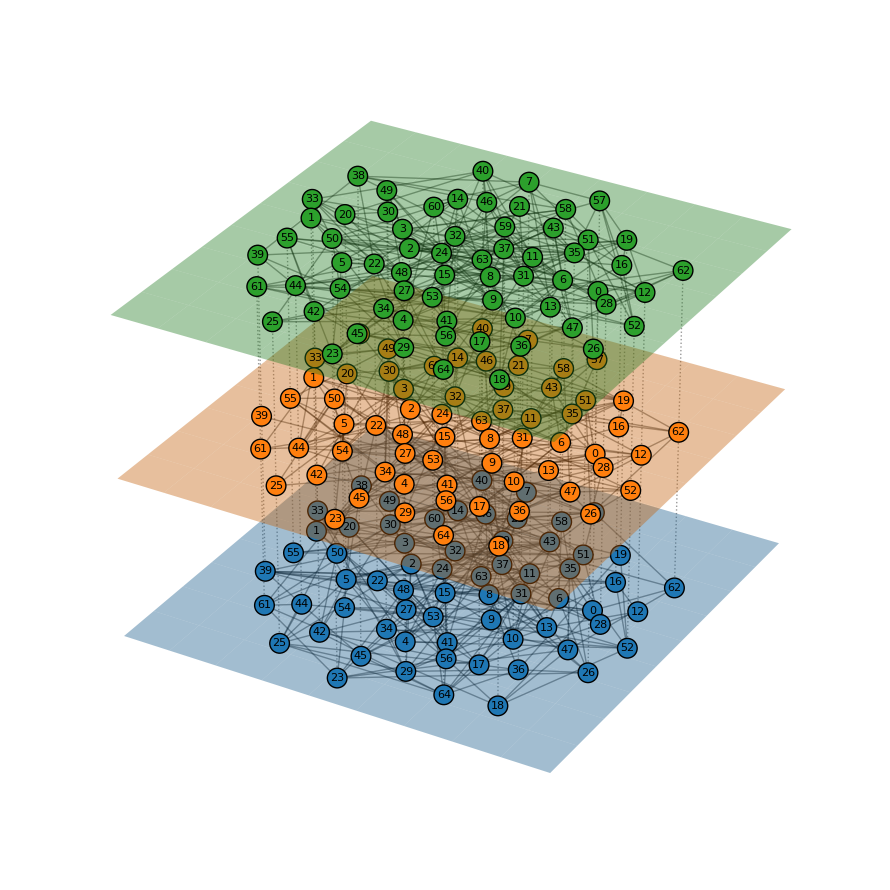

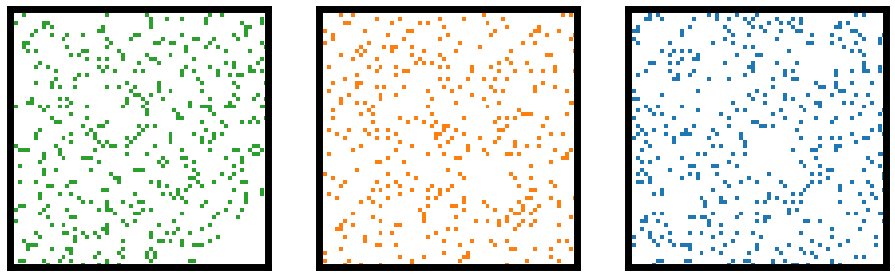

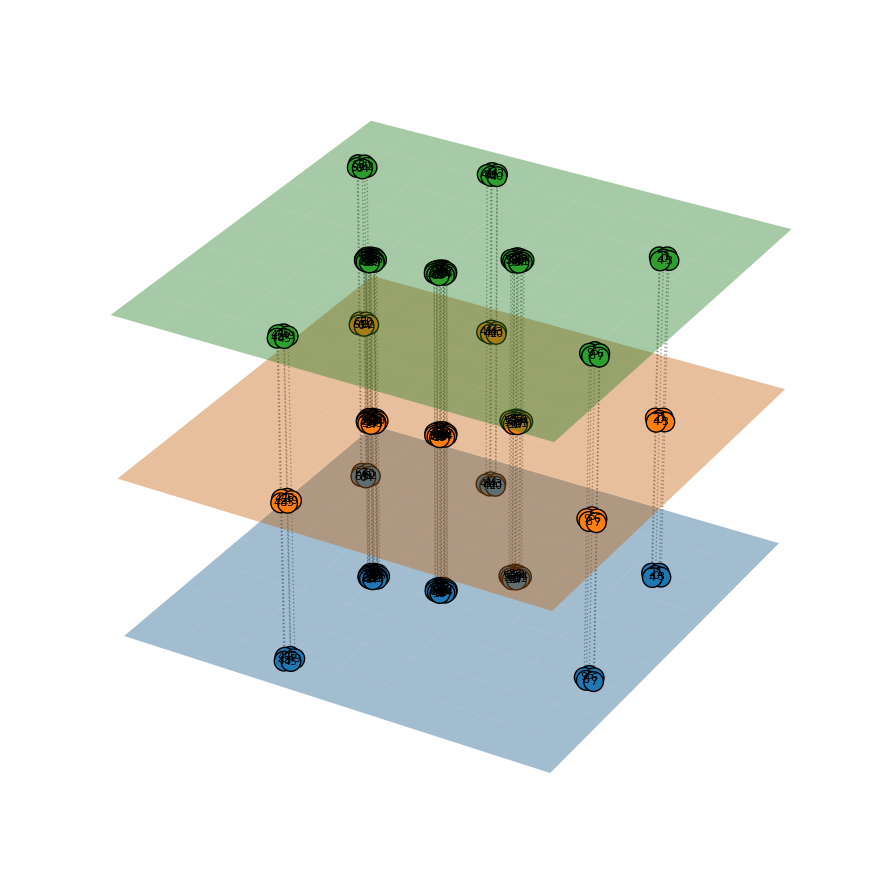

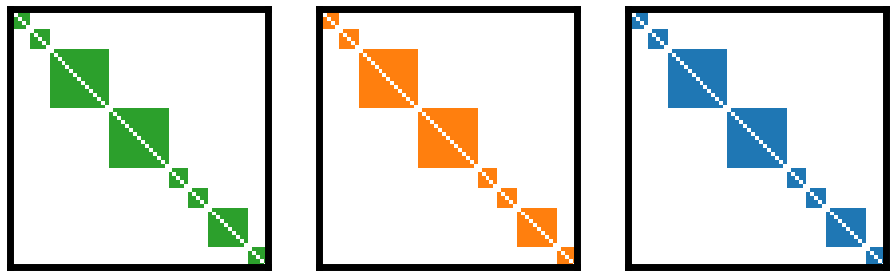

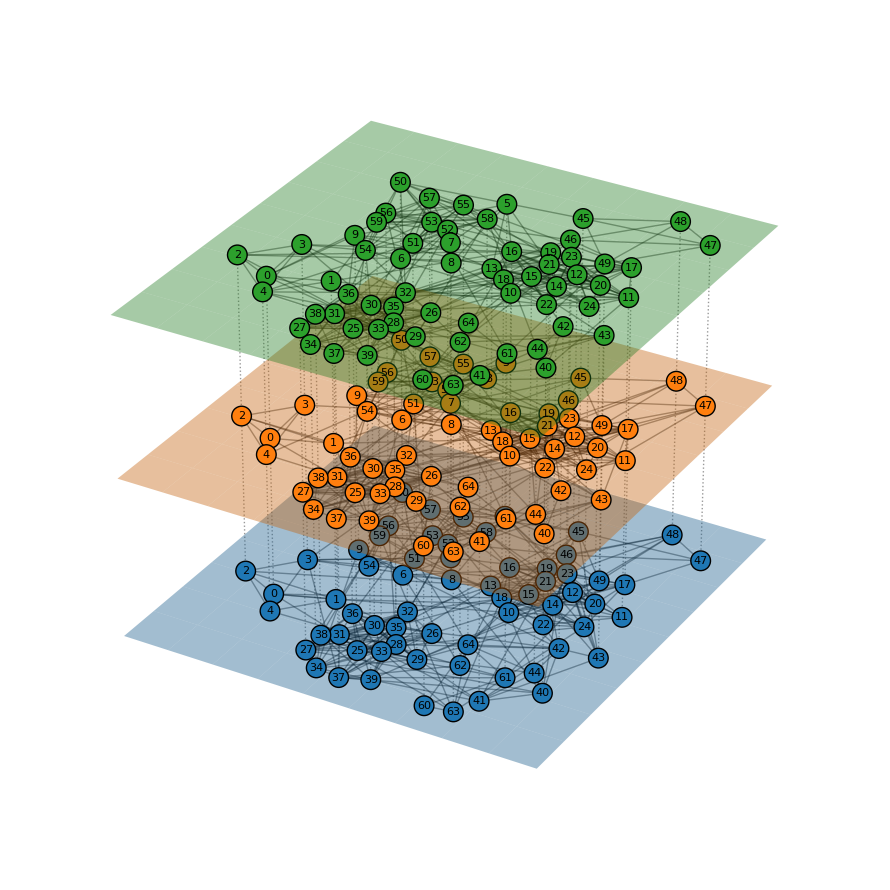

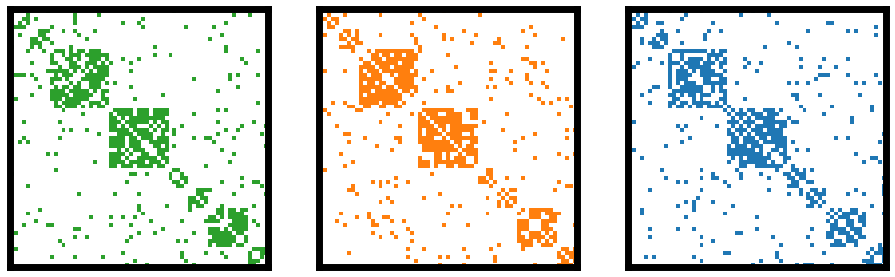

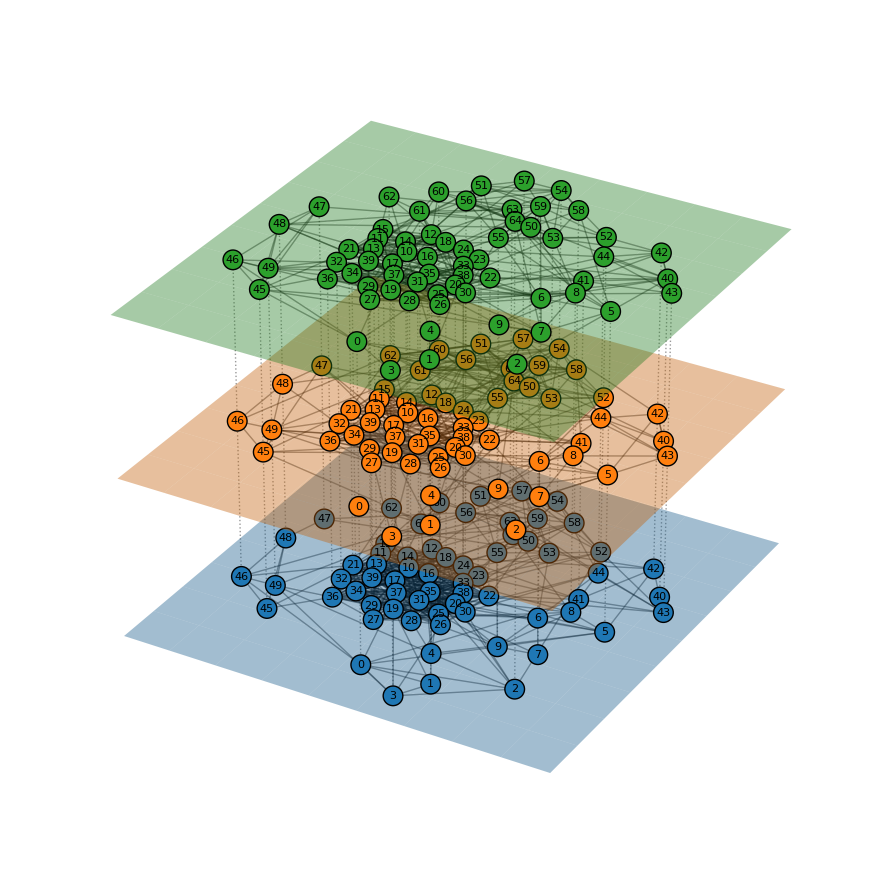

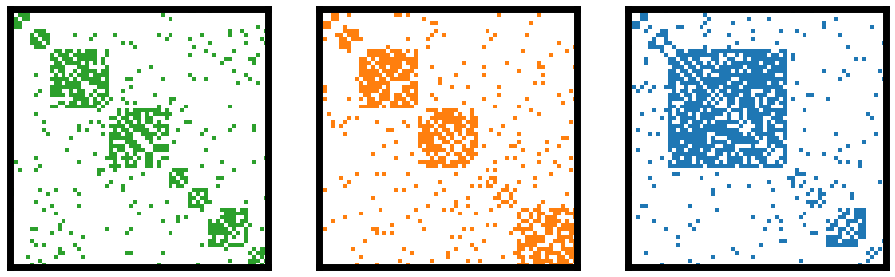

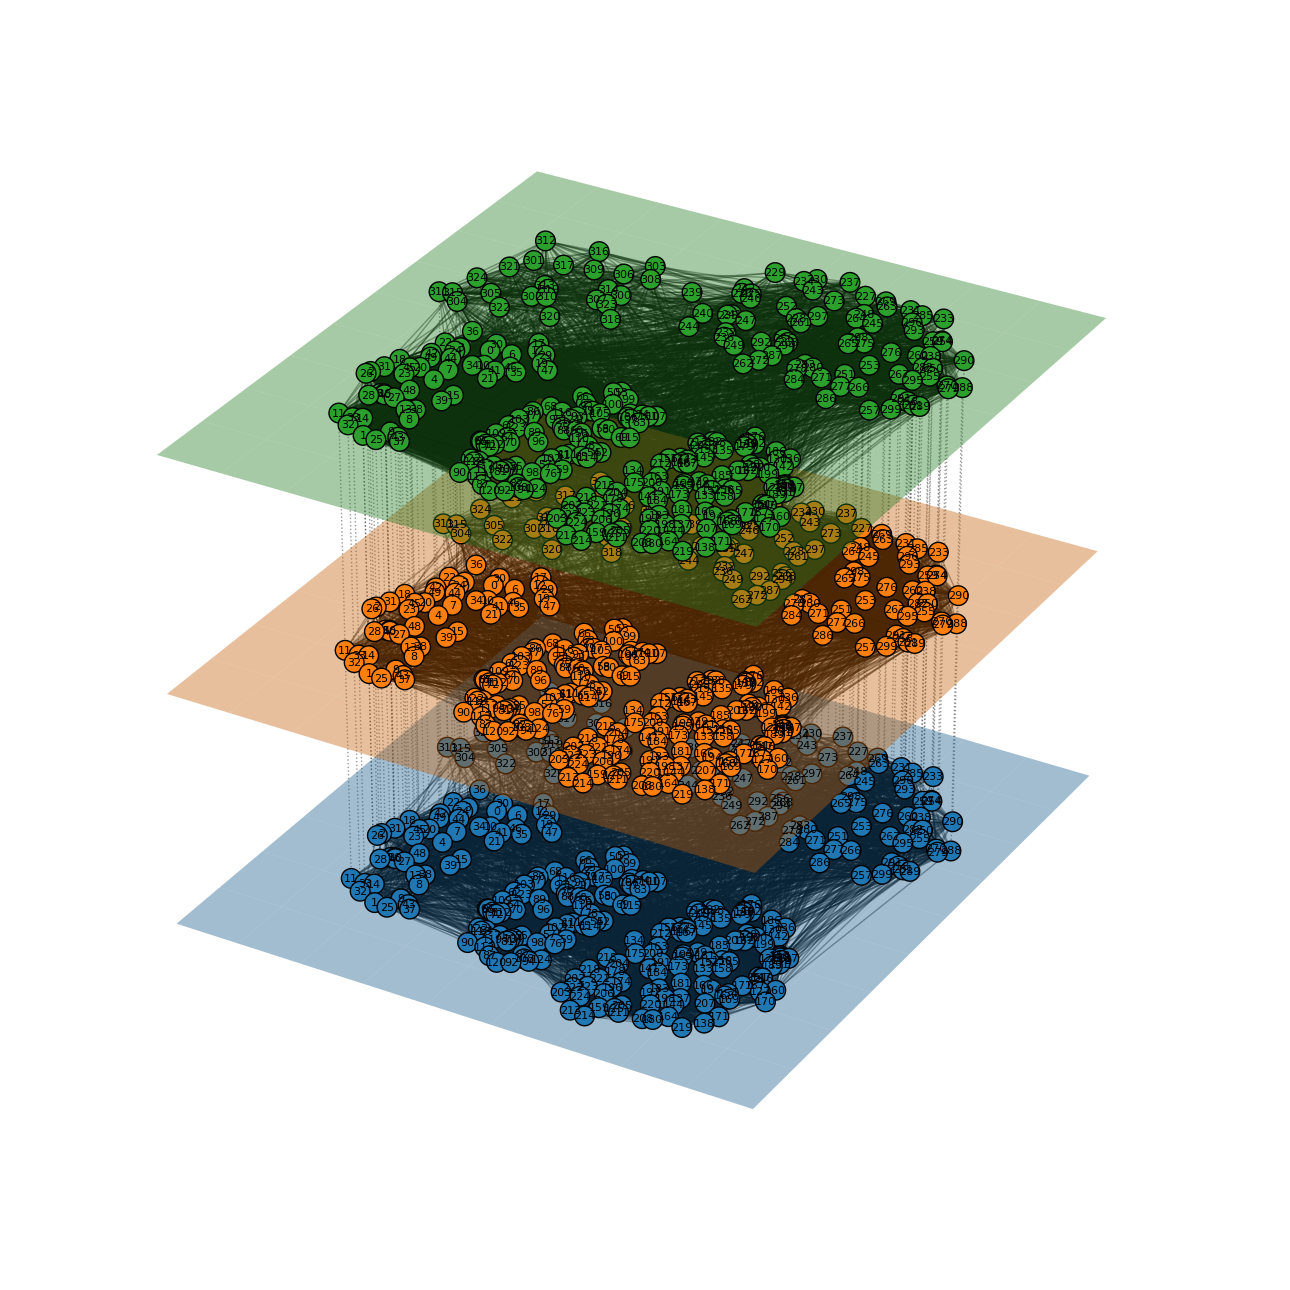

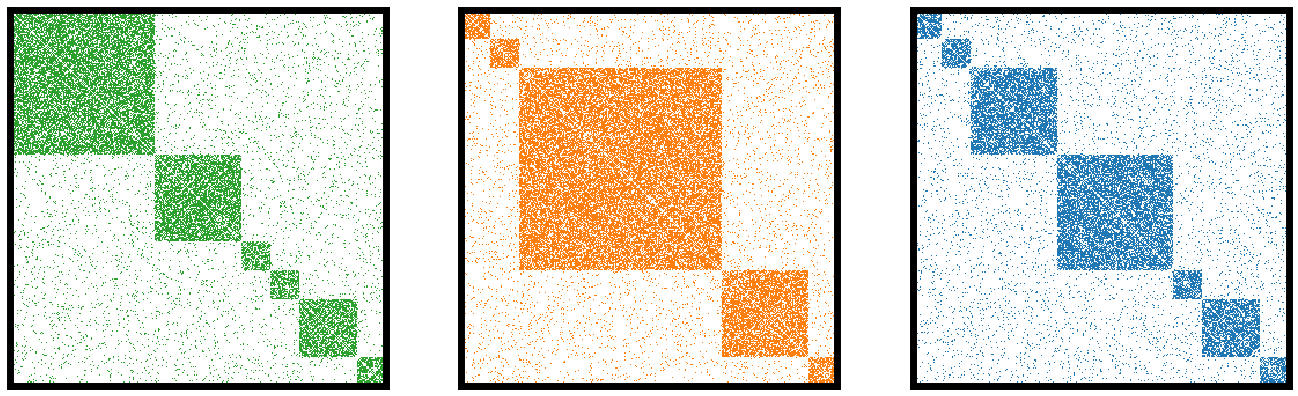

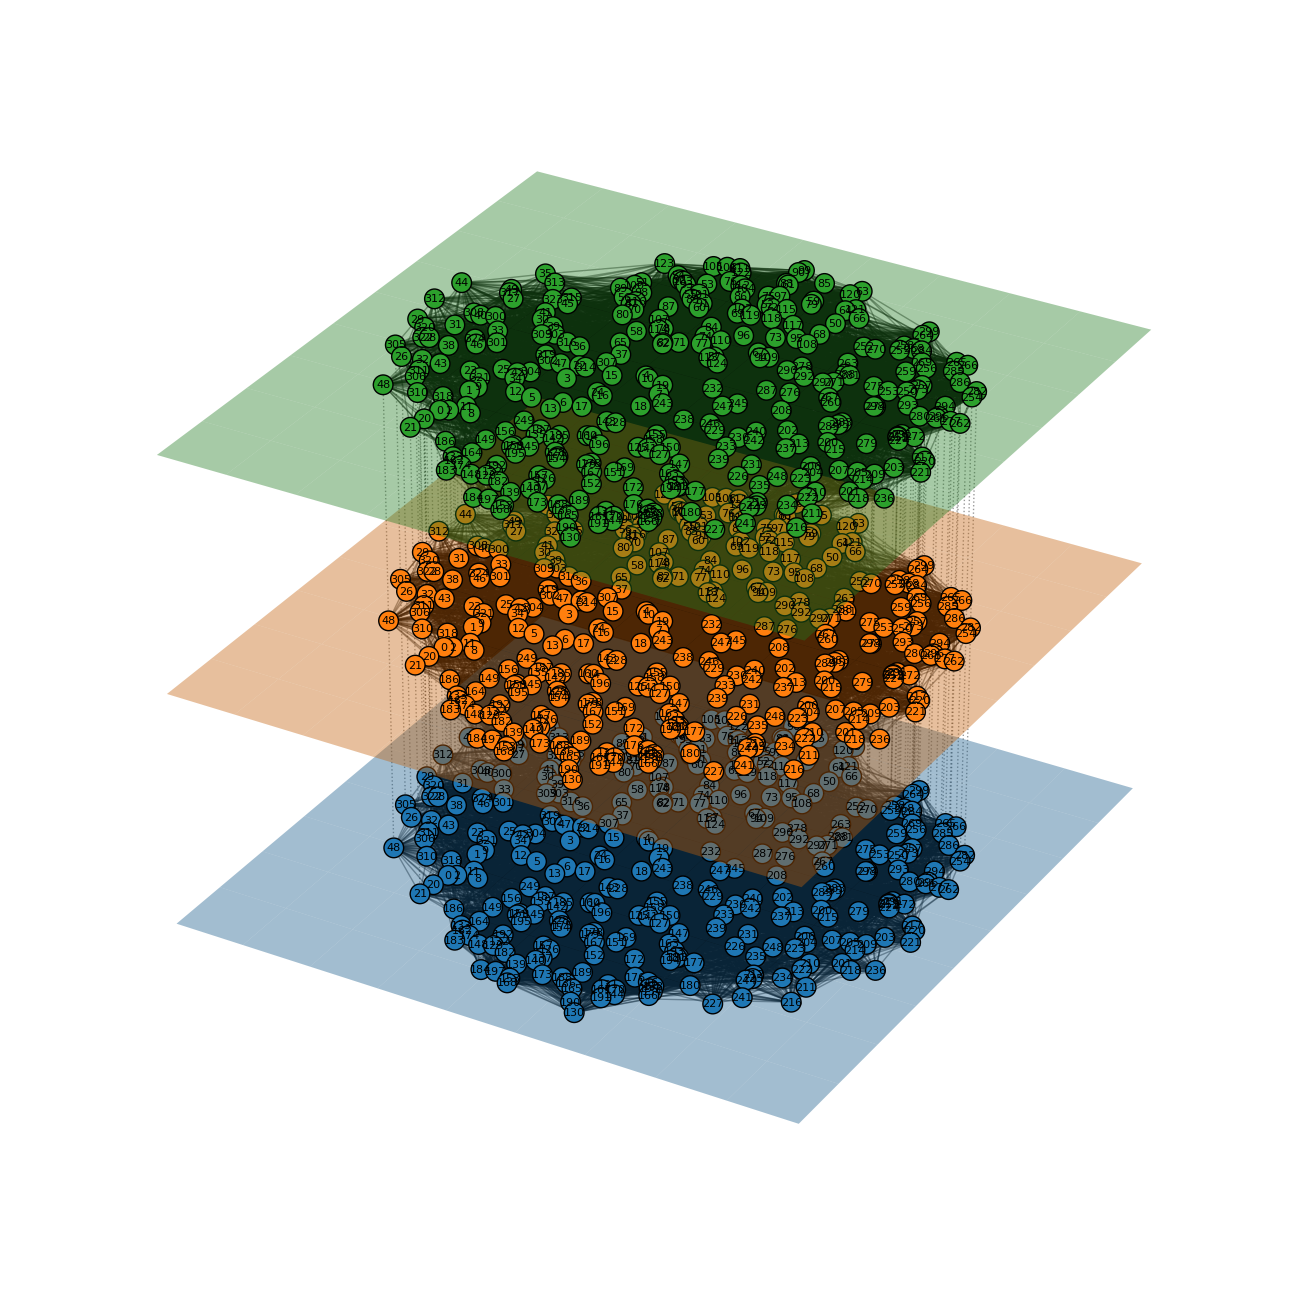

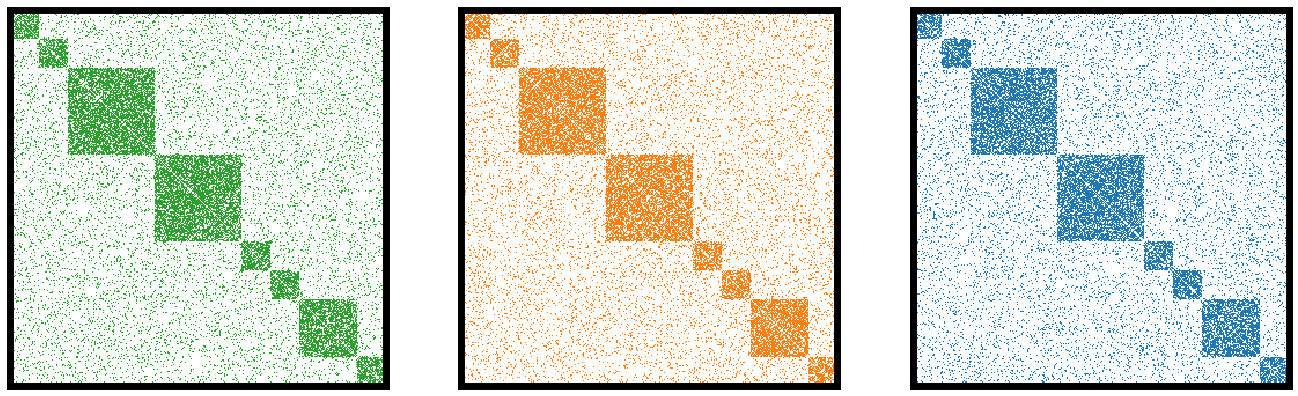

In [3]:
#Outputs
path = pathlib.Path().resolve()
save_path = path / "resources"

#Parameter for SBM
blocks = [5,5,15,15,5,5,10,5]
layers = 3

blocks_large = 5*np.array(blocks)



multiplex_RND = multinet_lib.Multiplex([nx.gnp_random_graph(np.sum(blocks),p=0.1) for _ in range (layers)])
multiplex_RND.plot_network()
multiplex_RND.plot_adj()

plt.show()

multiplex_perfect_SBM = multinet_lib.SBM_Multiplex(layers=layers,blocks=blocks,self_connectivity = 1,outer_connectivity = 0)
multiplex_perfect_SBM.plot_network()
multiplex_perfect_SBM.plot_adj()

multiplex_SBM = multinet_lib.SBM_Multiplex(layers=layers,blocks=blocks,self_connectivity = 0.7,outer_connectivity = 0.05)
multiplex_SBM.plot_network()
multiplex_SBM.plot_adj()


multiplex_SBM_mixed = multinet_lib.SBM_Multiplex(layers=layers,blocks=blocks,self_connectivity = 0.7,outer_connectivity = 0.05,block_mixing_chance=0.2)
multiplex_SBM_mixed.plot_network()
multiplex_SBM_mixed.plot_adj()

'''
multiplex_SBM_mixed_large = multinet_lib.SBM_Multiplex(layers=layers,blocks=blocks_large,self_connectivity = 0.7,outer_connectivity = 0.05,block_mixing_chance=0.2)
multiplex_SBM_mixed_large.plot_network()
multiplex_SBM_mixed_large.plot_adj()

multiplex_SBM_mixed_large.to_edgelist().loc[
        :, ["source", "source_layer", "target", "target_layer", "weight"]
    ].to_csv(save_path / "g1.edg", sep="\t", index=False, header=False)


multiplex_perfect_SBM_large = multinet_lib.SBM_Multiplex(layers=layers,blocks=blocks_large,self_connectivity = 0.7,outer_connectivity = 0.1)
multiplex_perfect_SBM_large.plot_network()
multiplex_perfect_SBM_large.plot_adj()

multiplex_perfect_SBM_large.to_edgelist().loc[
        :, ["source", "source_layer", "target", "target_layer", "weight"]
    ].to_csv(save_path / "g2.edg", sep="\t", index=False, header=False)

'''



[STATUS] Started parsing edgelist...
[STATUS] Finished parsing edgelist in 0 seconds
[STATUS] Started preprocessing transition probabilities...
[STATUS] Finished preprocessing transition probabilities in 0 seconds
[STATUS] Started generating random walks...
[STATUS] Finished generating random walks in 0 seconds
[STATUS] Started learning and saving embeddings...
[STATUS] Saved embeddings to /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources/example_embedded.csv
[STATUS] Finished learning and saving embeddings in 0 seconds
Completed multilayer network embedding in 0.5413196086883545 seconds. See results in /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources.


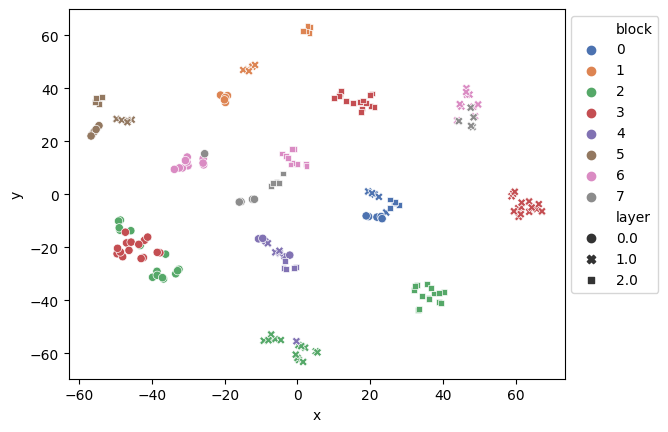

[STATUS] Started parsing edgelist...
[STATUS] Finished parsing edgelist in 0 seconds
[STATUS] Started preprocessing transition probabilities...
[STATUS] Finished preprocessing transition probabilities in 0 seconds
[STATUS] Started generating random walks...
[STATUS] Finished generating random walks in 0 seconds
[STATUS] Started learning and saving embeddings...
[STATUS] Saved embeddings to /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources/example_embedded2.csv
[STATUS] Finished learning and saving embeddings in 0 seconds
Completed multilayer network embedding in 0.5252456665039062 seconds. See results in /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources.


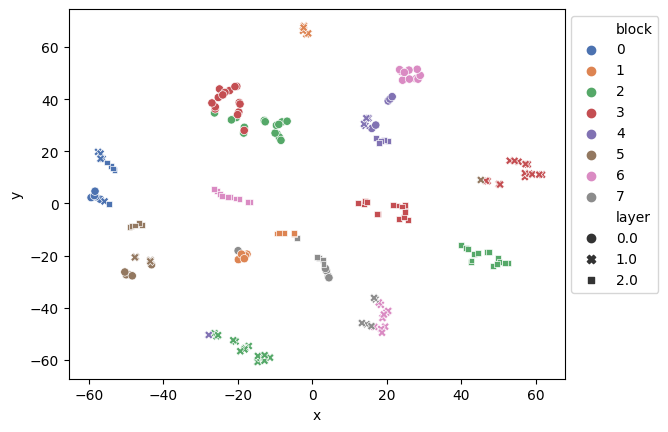

In [14]:
multiplex_SBM_mixed.to_edgelist().loc[
        :, ["source", "source_layer", "target", "target_layer", "weight"]
    ].to_csv(save_path / "example.edg", sep="\t", index=False, header=False)

hh2v.henhoe2vec.run(save_path / "example.edg", save_path, output_name="example_embedded",q=1.0,s=1.0,num_walks=20)

df,df_embed = plot2D_embeddings(save_path / "example_embedded",blocks,save=True)

hh2v.henhoe2vec.run(save_path / "example.edg", save_path, output_name="example_embedded2",q=1.0,s=1.0,num_walks=20)

df,df_embed = plot2D_embeddings(save_path / "example_embedded2",blocks,save=True)

In [13]:
def plot2D_embeddings(path,true_blocks,save=False):
    df = pd.read_csv(path.parent / (path.name + '.csv'), sep="\t", index_col=0, header=None)

    df_embed = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(df.values)
    df_embed = pd.DataFrame(df_embed,columns=['x','y'])

    df_embed.index = [ast.literal_eval(tpl) for tpl in df.index]
    df_embed["node"],df_embed["layer"] = zip(*df_embed.index.tolist())

    node_to_block = [block for block in range(len(true_blocks)) for _ in range(true_blocks[block])]
    df_embed['block'] = [node_to_block[int(float(node))] for node in df_embed['node']]

    

    
    plt.figure()
    ax = sns.scatterplot(df_embed,x='x',y='y',hue='block',style='layer',palette="deep") #,ax=axs[i])
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()

    if save:
        plt.savefig(path.parent / (path.name + '.png'))

    plt.show()

    return df,df_embed

[STATUS] Started parsing edgelist...
[STATUS] Finished parsing edgelist in 0 seconds
[STATUS] Started preprocessing transition probabilities...
[STATUS] Finished preprocessing transition probabilities in 2 seconds
[STATUS] Started generating random walks...
[STATUS] Finished generating random walks in 2 seconds
[STATUS] Started learning and saving embeddings...
[STATUS] Saved embeddings to /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources/sample0embedded.csv
[STATUS] Finished learning and saving embeddings in 0 seconds
Completed multilayer network embedding in 5.67732310295105 seconds. See results in /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources.


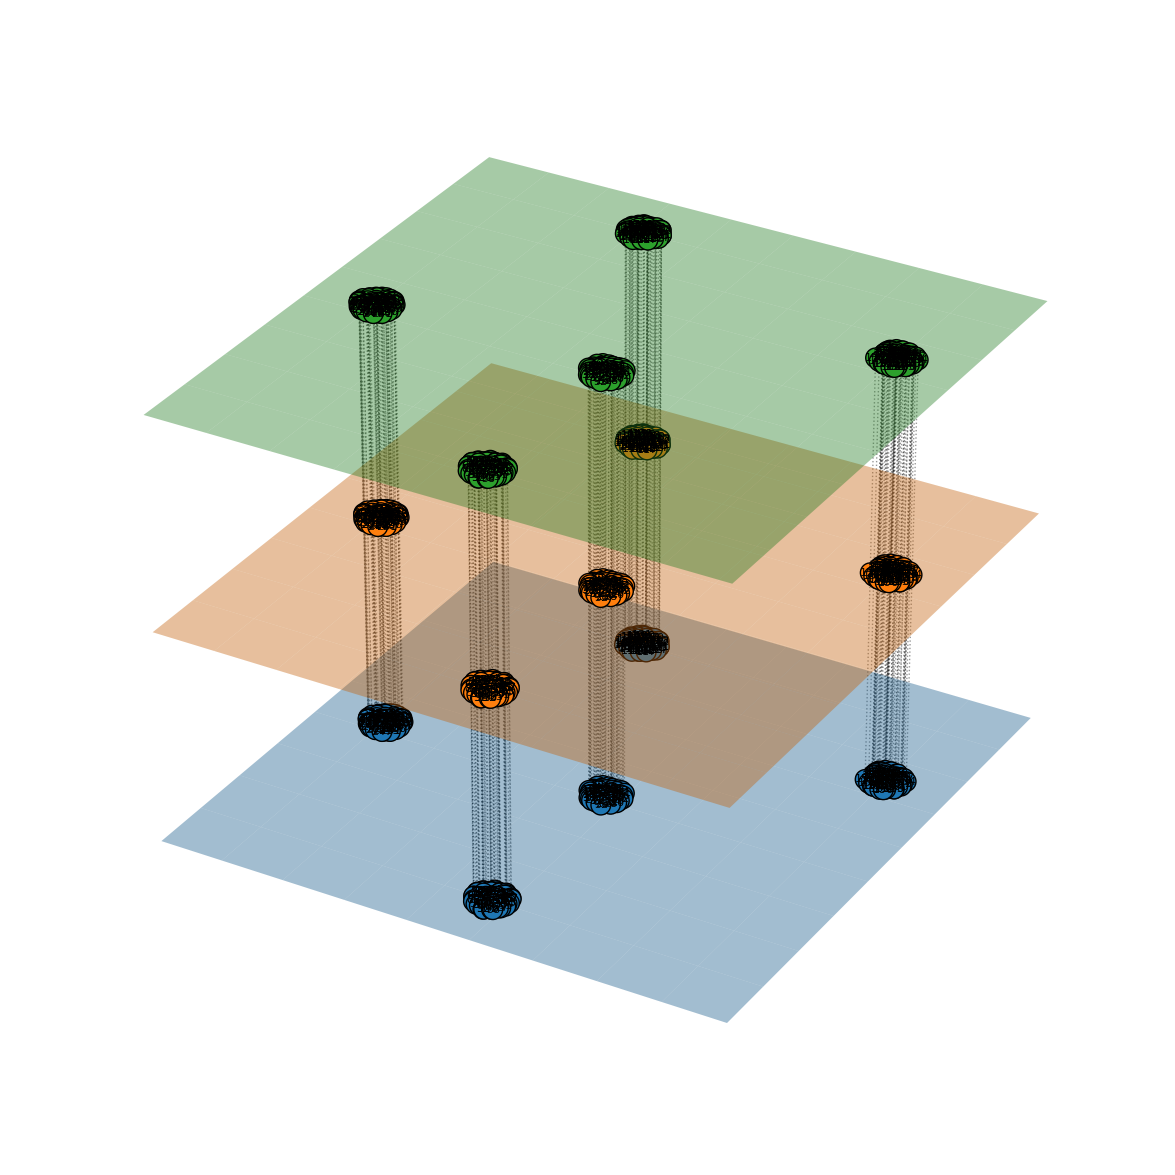

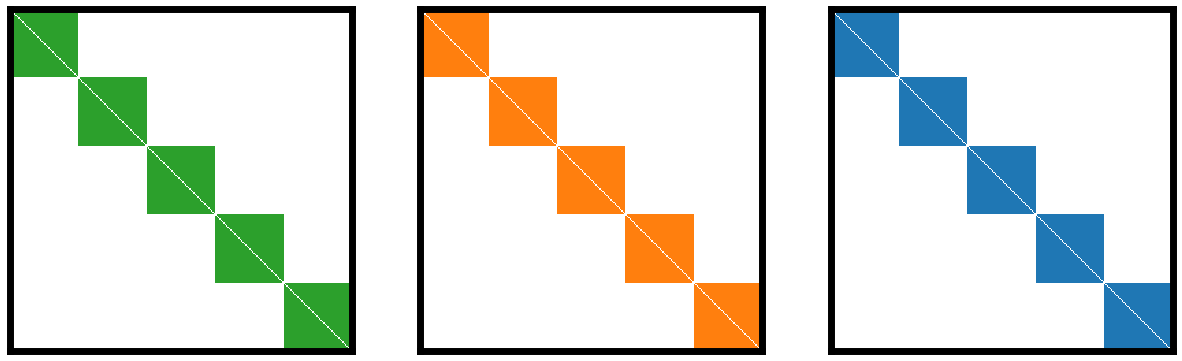

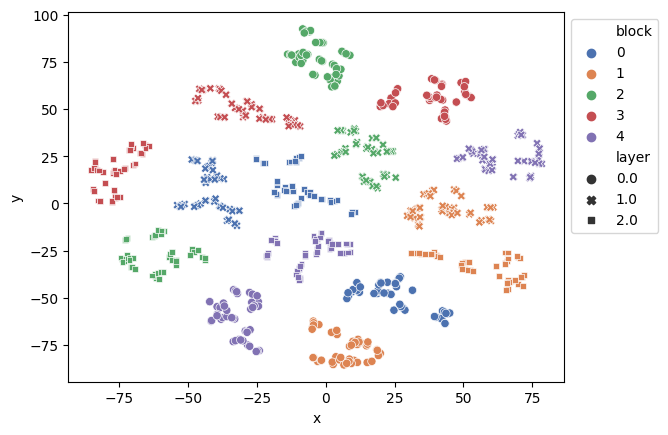

[STATUS] Started parsing edgelist...
[STATUS] Finished parsing edgelist in 0 seconds
[STATUS] Started preprocessing transition probabilities...
[STATUS] Finished preprocessing transition probabilities in 0 seconds
[STATUS] Started generating random walks...
[STATUS] Finished generating random walks in 0 seconds
[STATUS] Started learning and saving embeddings...
[STATUS] Saved embeddings to /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources/sample1embedded.csv
[STATUS] Finished learning and saving embeddings in 0 seconds
Completed multilayer network embedding in 0.6063928604125977 seconds. See results in /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources.


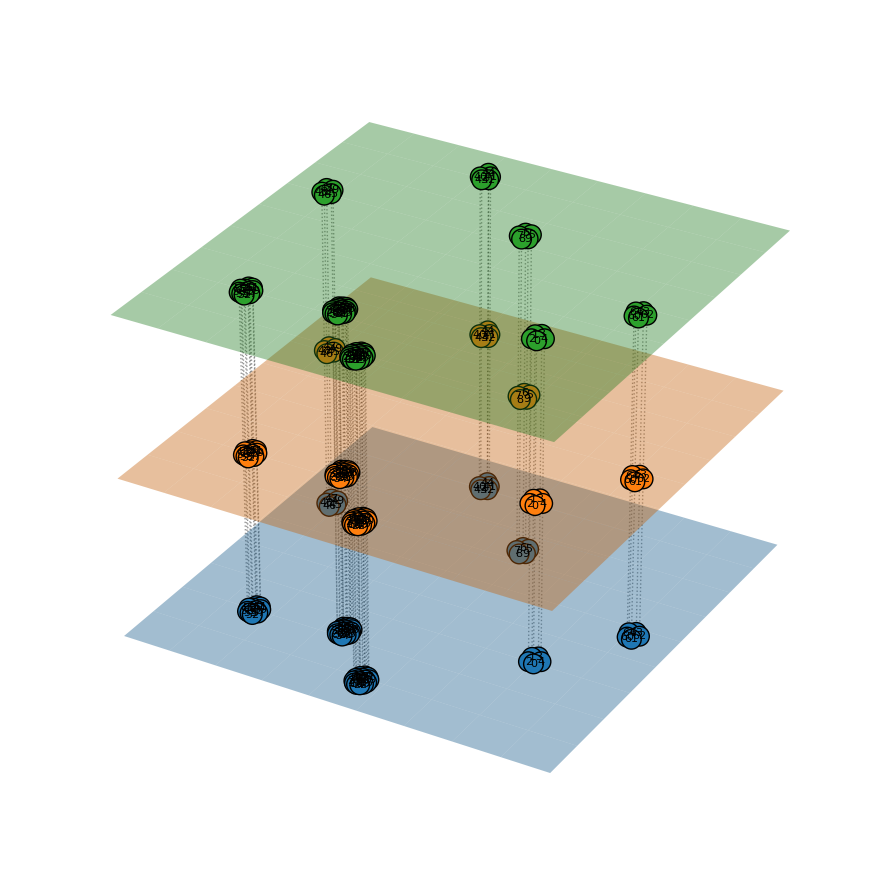

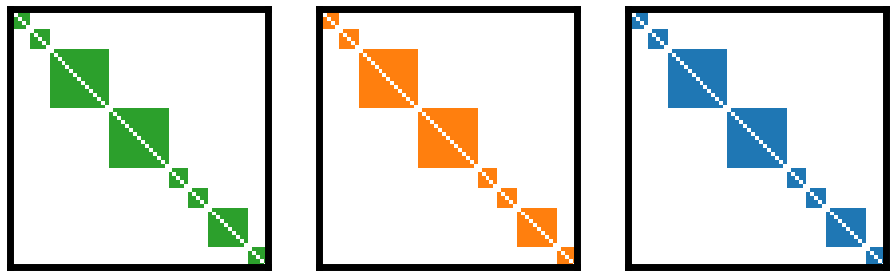

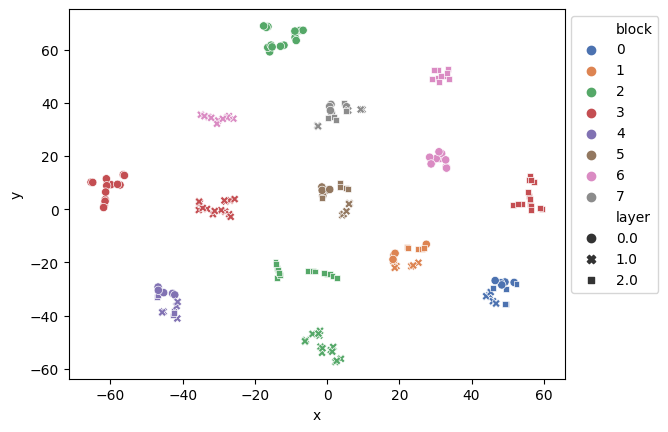

[STATUS] Started parsing edgelist...
[STATUS] Finished parsing edgelist in 0 seconds
[STATUS] Started preprocessing transition probabilities...
[STATUS] Finished preprocessing transition probabilities in 2 seconds
[STATUS] Started generating random walks...
[STATUS] Finished generating random walks in 1 seconds
[STATUS] Started learning and saving embeddings...
[STATUS] Saved embeddings to /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources/sample2embedded.csv
[STATUS] Finished learning and saving embeddings in 0 seconds
Completed multilayer network embedding in 5.227043390274048 seconds. See results in /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources.


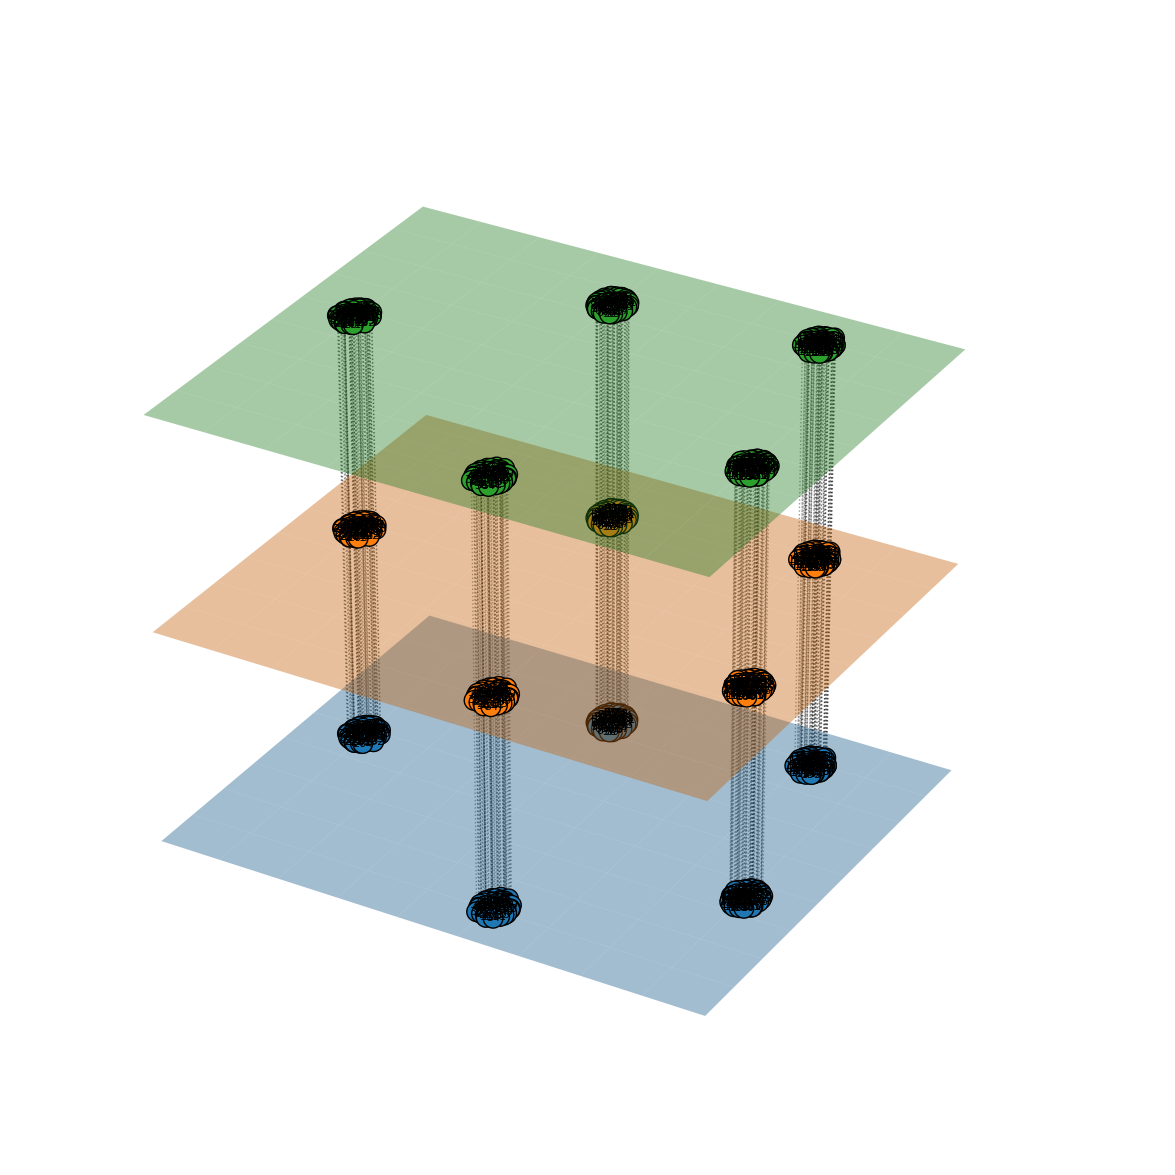

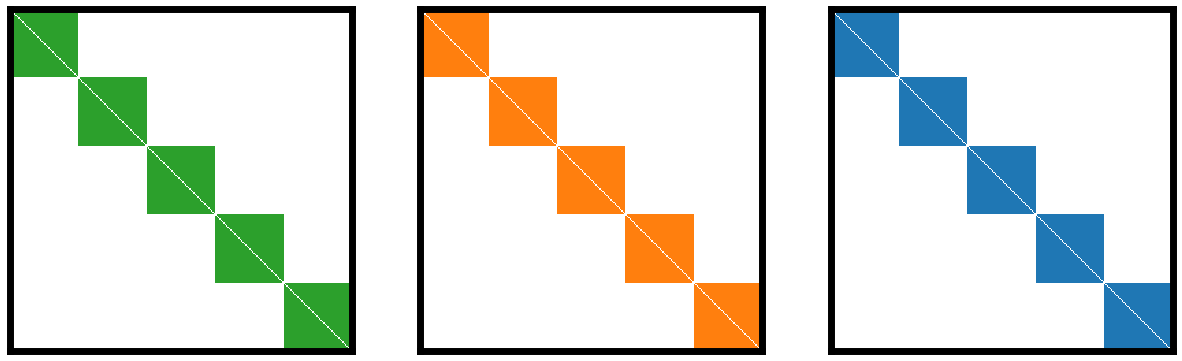

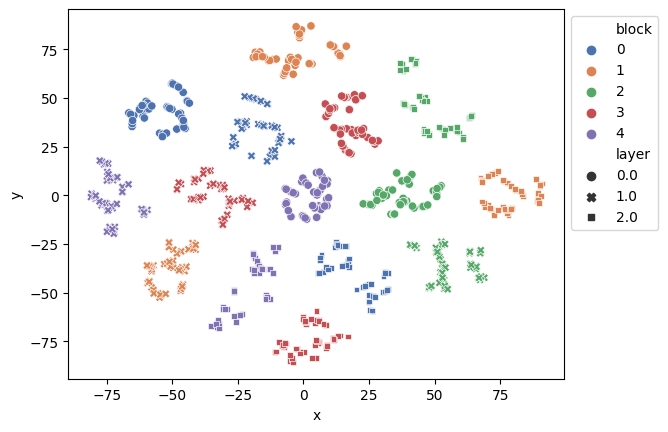

[STATUS] Started parsing edgelist...
[STATUS] Finished parsing edgelist in 0 seconds
[STATUS] Started preprocessing transition probabilities...
[STATUS] Finished preprocessing transition probabilities in 0 seconds
[STATUS] Started generating random walks...
[STATUS] Finished generating random walks in 0 seconds
[STATUS] Started learning and saving embeddings...
[STATUS] Saved embeddings to /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources/sample3embedded.csv
[STATUS] Finished learning and saving embeddings in 0 seconds
Completed multilayer network embedding in 0.4749307632446289 seconds. See results in /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources.


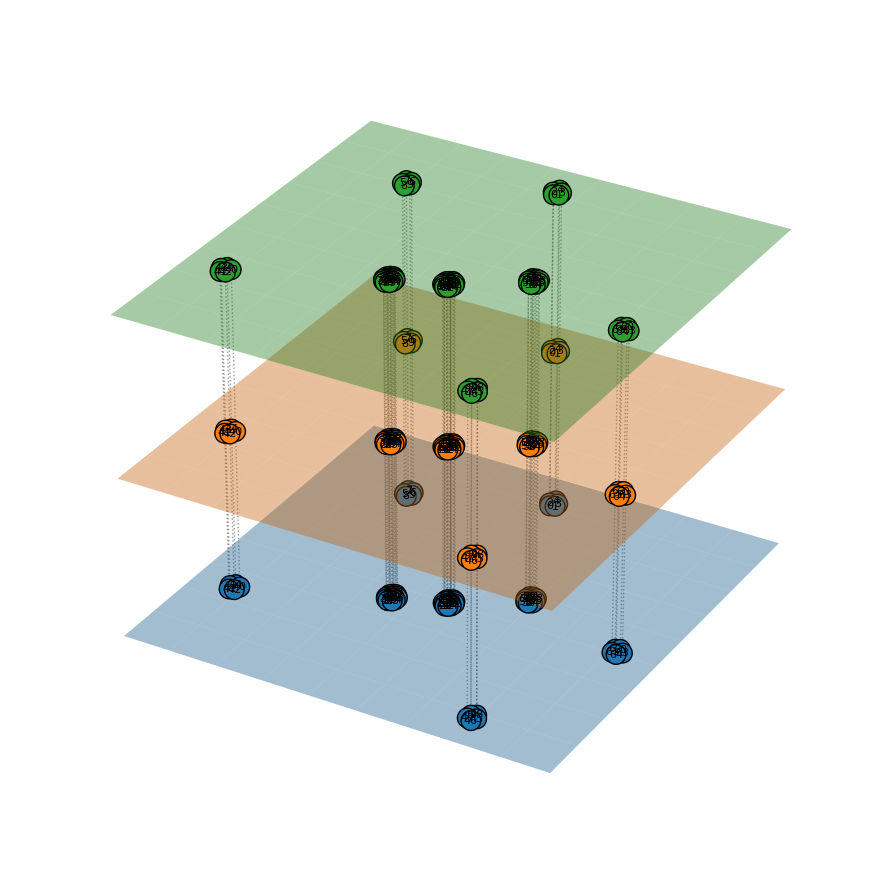

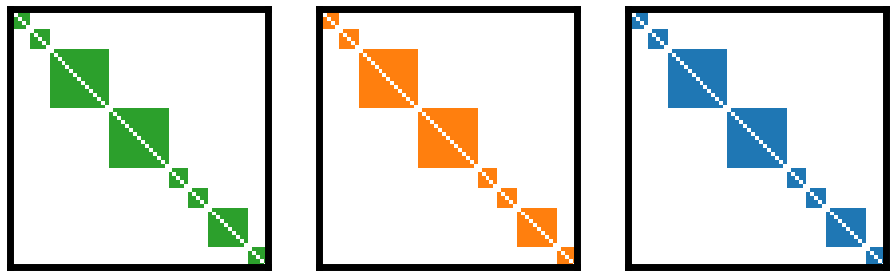

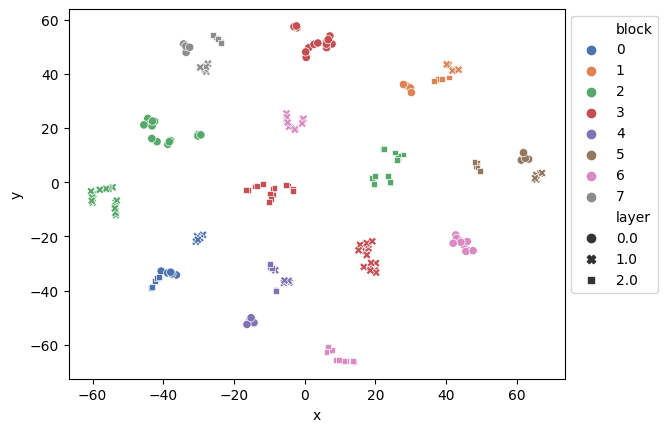

[STATUS] Started parsing edgelist...
[STATUS] Finished parsing edgelist in 0 seconds
[STATUS] Started preprocessing transition probabilities...
[STATUS] Finished preprocessing transition probabilities in 2 seconds
[STATUS] Started generating random walks...
[STATUS] Finished generating random walks in 1 seconds
[STATUS] Started learning and saving embeddings...
[STATUS] Saved embeddings to /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources/sample4embedded.csv
[STATUS] Finished learning and saving embeddings in 0 seconds
Completed multilayer network embedding in 5.233762979507446 seconds. See results in /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources.


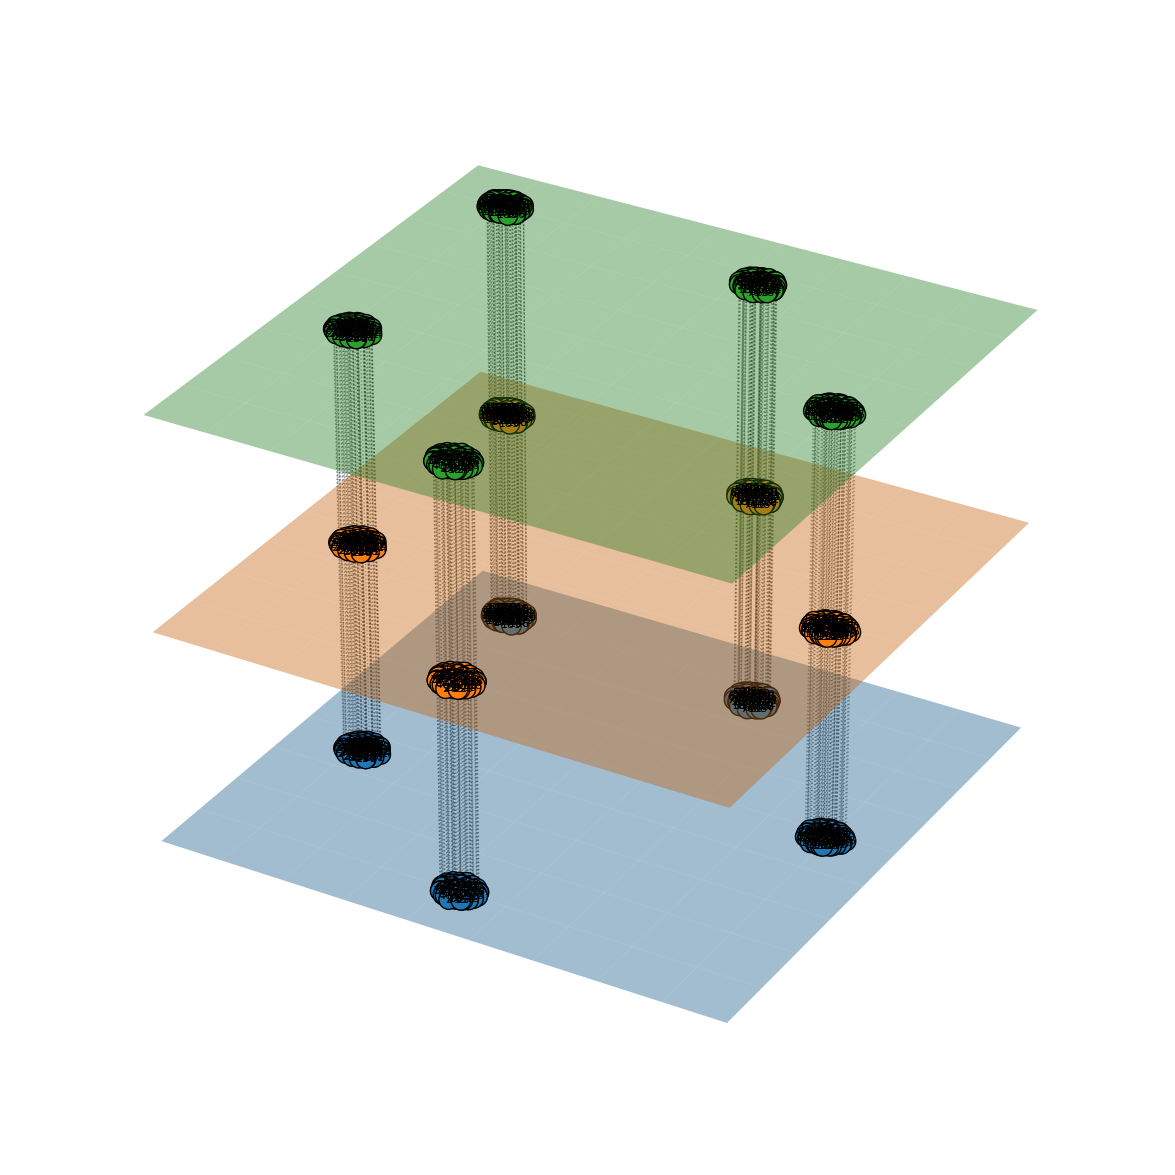

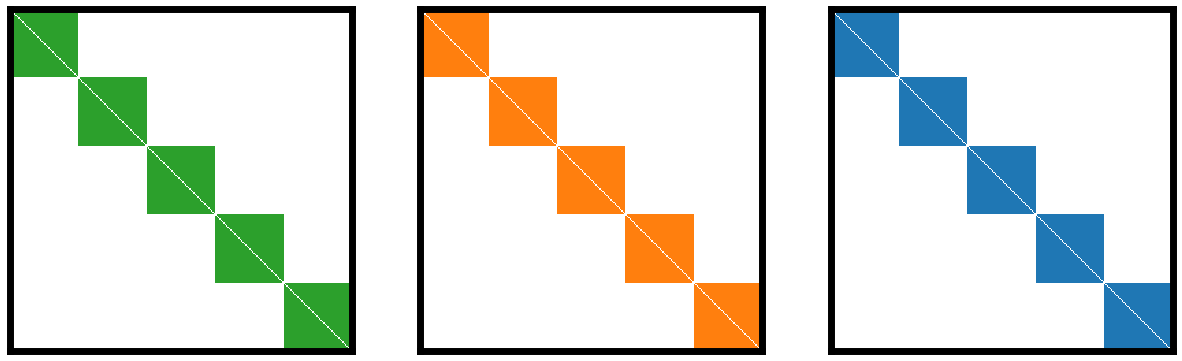

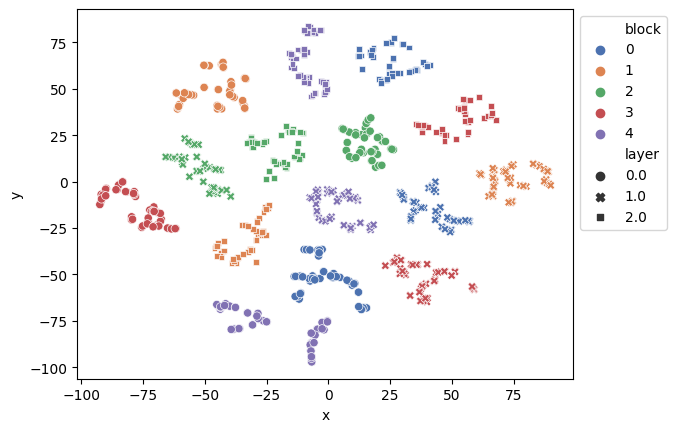

[STATUS] Started parsing edgelist...
[STATUS] Finished parsing edgelist in 0 seconds
[STATUS] Started preprocessing transition probabilities...
[STATUS] Finished preprocessing transition probabilities in 0 seconds
[STATUS] Started generating random walks...
[STATUS] Finished generating random walks in 0 seconds
[STATUS] Started learning and saving embeddings...
[STATUS] Saved embeddings to /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources/sample5embedded.csv
[STATUS] Finished learning and saving embeddings in 0 seconds
Completed multilayer network embedding in 0.4830923080444336 seconds. See results in /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources.


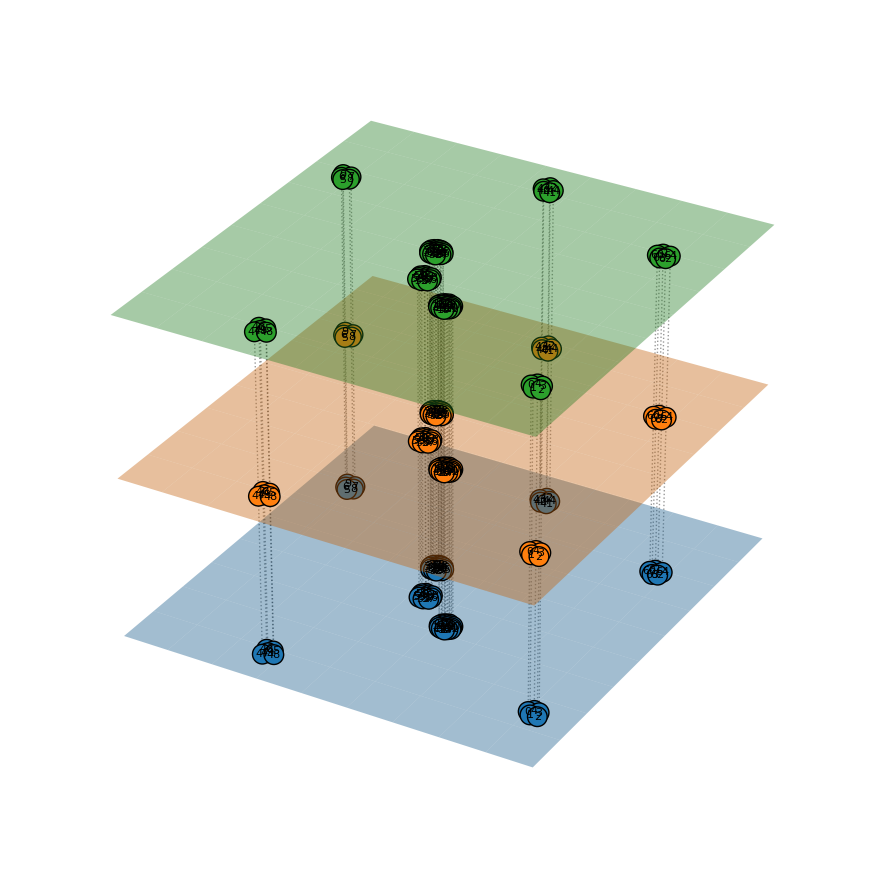

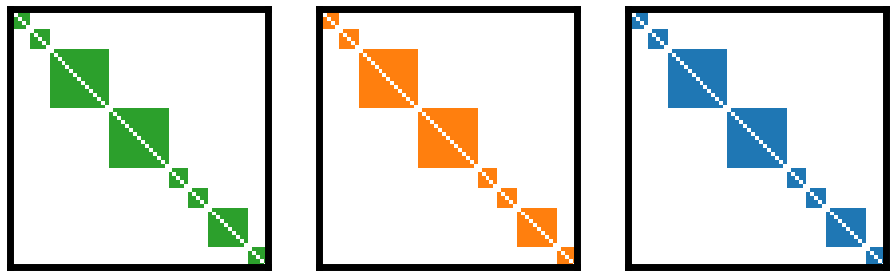

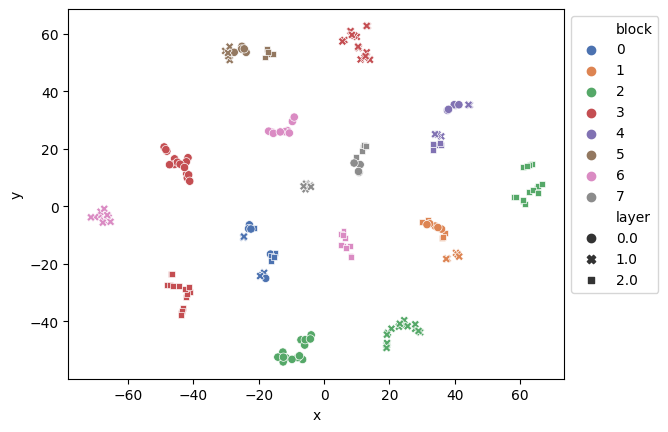

In [6]:
layers = 3
SBM_samples = 3
SBM_blocks = [[50,50,50,50,50],  [5,5,15,15,5,5,10,5]] *SBM_samples 
sampled_SBMs = []

for i,blocks in enumerate(SBM_blocks):
    sampled_SBMs.append(multinet_lib.SBM_Multiplex(layers=layers,blocks=blocks,self_connectivity = 1,outer_connectivity = 0))
    sampled_SBMs[-1].plot()
    sampled_SBMs[-1].to_edgelist().loc[
        :, ["source", "source_layer", "target", "target_layer", "weight"]
    ].to_csv(save_path / ("sample"+str(i)+".edg"), sep="\t", index=False, header=False)

    hh2v.henhoe2vec.run(save_path / ("sample"+str(i)+".edg"), save_path, output_name=("sample"+str(i)+"embedded"),q=1.0,s=1.0,num_walks=20)

    df,df_embed = plot2D_embeddings(save_path / ("sample"+str(i)+"embedded.csv"),blocks)

    



In [5]:



hh2v.henhoe2vec.run(save_path / "g1.edg", save_path, output_name="g1")


hh2v.henhoe2vec.run(save_path / "g2.edg", save_path, output_name="g2")

[STATUS] Started parsing edgelist...
[STATUS] Finished parsing edgelist in 0 seconds
[STATUS] Started preprocessing transition probabilities...
[STATUS] Finished preprocessing transition probabilities in 6 seconds
[STATUS] Started generating random walks...
[STATUS] Finished generating random walks in 1 seconds
[STATUS] Started learning and saving embeddings...
[STATUS] Saved embeddings to /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources/g1.csv
[STATUS] Finished learning and saving embeddings in 0 seconds
Completed multilayer network embedding in 8.962503671646118 seconds. See results in /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources.
[STATUS] Started parsing edgelist...
[STATUS] Finished parsing edgelist in 0 seconds
[STATUS] Started preprocessing transition probabilities...
[STATUS] Finished preprocessing transition probabilities in 7 seconds
[STATUS] Started generating random walks...
[STATUS] Finished generating random walks in 1 seconds
[STATUS] Started learning and saving embeddi

                     x          y
(0.0, 0.0)  -52.236229 -48.906242
(0.0, 1.0)   65.478745  10.129930
(0.0, 2.0)  -39.242016  11.346473
(1.0, 0.0)  -70.704750 -43.597038
(1.0, 1.0)   63.974987  41.218826
...                ...        ...
(98.0, 1.0) -57.603867   0.488806
(98.0, 2.0) -64.366547  45.937283
(99.0, 0.0) -32.651985 -59.495373
(99.0, 1.0) -68.590584  -7.058549
(99.0, 2.0) -64.516830  47.868187

[975 rows x 2 columns]


IndexError: list index out of range

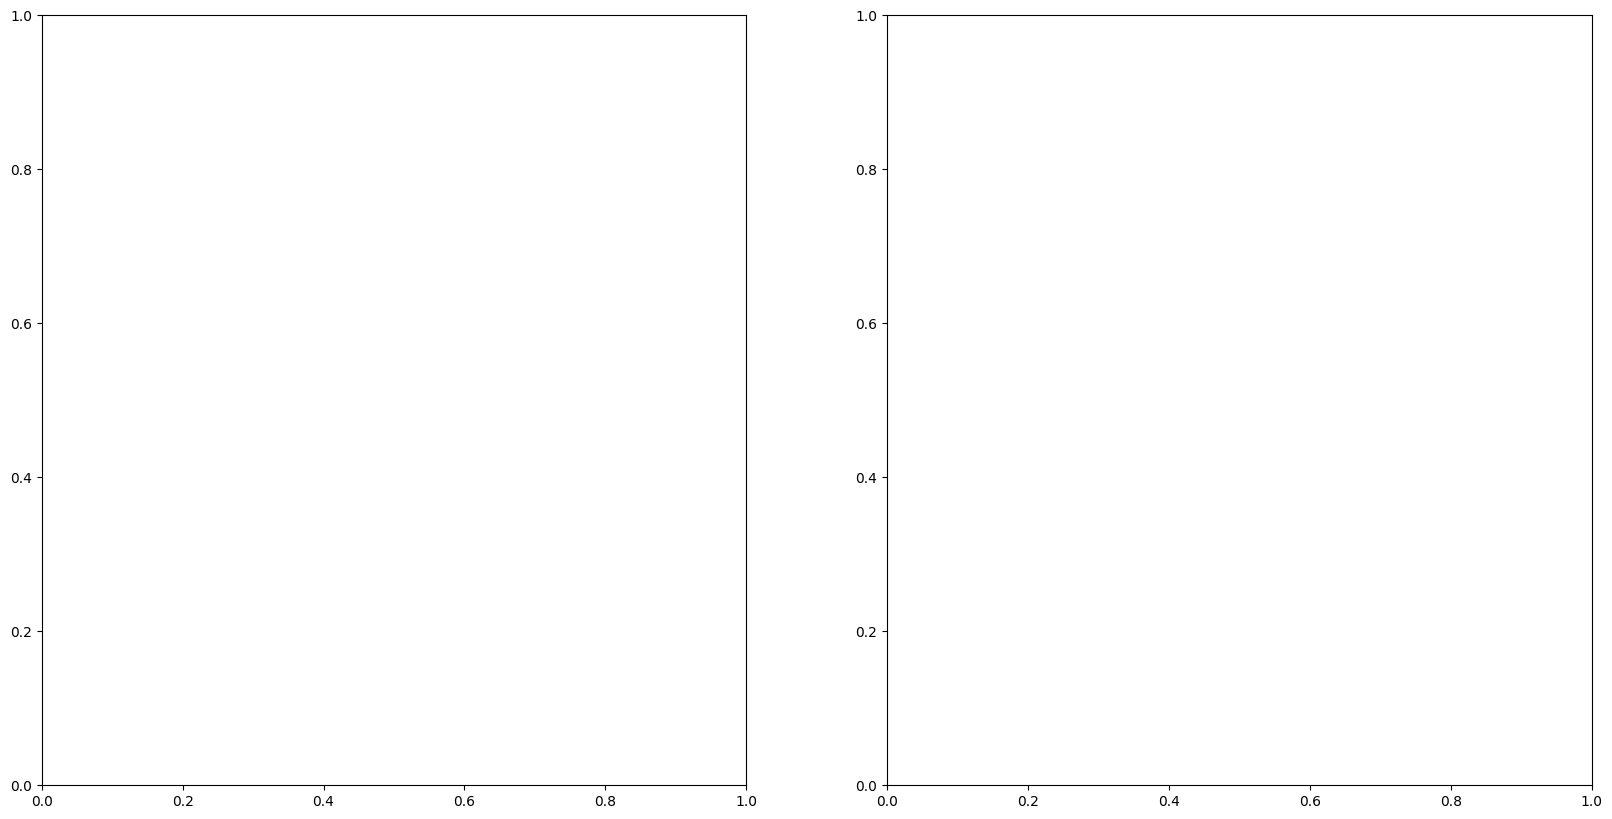

In [6]:


graphs = ["g1","g2"]
fig, axs = plt.subplots(ncols=len(graphs),figsize=(20.,10.))

for i,g in enumerate(graphs):

    df = pd.read_csv(save_path / (g + ".csv"), sep="\t", index_col=0, header=None)

    df_embed = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(df.values)
    df_embed = pd.DataFrame(df_embed,columns=['x','y'])

    df_embed.index = [ast.literal_eval(tpl) for tpl in df.index]
    print(df_embed)
    df_embed["node"],df_embed["layer"] = zip(*df_embed.index.tolist())

    node_to_block = [block for block in range(len(blocks)) for _ in range(blocks_large[block])]
    df_embed['block'] = [node_to_block[int(float(node))] for node in df_embed['node']]

    df_embed

    

    sns.scatterplot(df_embed,x='x',y='y',hue='block',style='layer',palette="deep",ax=axs[i])
    sns.move_legend(axs[i], "upper left", bbox_to_anchor=(1, 1))
